In [10]:
import pandas as pd
import json
import os
with open("/home/aamad/Desktop/phd/codice/city-pro/config/ConfigPythonAnalysis.json","r") as f:
    Dict =json.load(f)
df = pd.read_csv(os.path.join(Dict["InputBaseDir"],Dict["base_name"] + '_' + Dict["StrDates"][3] + '_' + Dict['StrDates'][3] + '_fcm_centers.csv'),delimiter = ";")

In [14]:
import pandas as pd

# Step 1: Create a sample DataFrame
data = {
    'value_to_bin': [10, 6, 1, 6, 5, 6, 7, 8, 9, 10],
    'value_to_average': [5, 3, 6, 2, 7, 4, 8, 1, 9, 2]
}
df = pd.DataFrame(data)

# Step 2: Bin the data in 'value_to_bin'
bins = [0, 3, 6, 9, 12]  # Define bin edges
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4']  # Define bin labels

df['bins'] = pd.cut(df['value_to_bin'], bins=bins, labels=labels, right=False)
print(df)
# Step 3: Group by the bins and compute the average of 'value_to_average'
result = df.groupby('bins')['value_to_average'].mean().reset_index()

print(result)

   value_to_bin  value_to_average  bins
0            10                 5  Bin4
1             6                 3  Bin3
2             1                 6  Bin1
3             6                 2  Bin3
4             5                 7  Bin2
5             6                 4  Bin3
6             7                 8  Bin3
7             8                 1  Bin3
8             9                 9  Bin4
9            10                 2  Bin4
   bins  value_to_average
0  Bin1          6.000000
1  Bin2          7.000000
2  Bin3          3.600000
3  Bin4          5.333333


/tmp/ipykernel_37565/3532013409.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('bins')['value_to_average'].mean().reset_index()


{1: {'holiday': 'red', 'not_holiday': 'blue'}, 2: {'holiday': 'green', 'not_holiday': 'orange'}, 3: {'holiday': 'purple', 'not_holiday': 'brown'}, 4: {'holiday': 'pink', 'not_holiday': 'gray'}}
Point:  0.8  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.47  StdDev:  0.01  Class: 1  type:  holiday  Color:  red  Shape:  o  Identifier:  (1, 'holiday')
Point:  0.42  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.81  StdDev:  0.01  Class: 1  type:  not_holiday  Color:  blue  Shape:  s  Identifier:  (1, 'not_holiday')
Point:  0.9  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.94  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.88  StdDev:  0.0  Class: 3  type:  not_holiday  Color:  brown  Shape:  <  Identifier:  (3, 'not_holiday')
Point:  0.83  StdDev:  0.

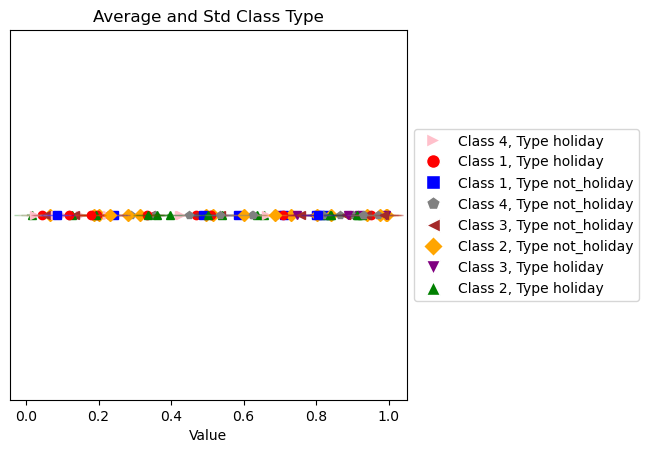

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Example data
N = 100  # Number of points
Avareges = np.random.rand(N)  # Random average values
std_devs = np.random.rand(N) * 0.01  # Random standard deviations
classes = np.random.randint(1, 5, size=N)  # Random classes between 1 and 4
Types = ["holiday","not_holiday"]
types = np.random.choice(Types, N)
PossibleShapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'P', '*', 'X']
PossibleColors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']
Classes = [1, 2, 3, 4]
Class2Type2Colors = {Class: {Type:"" for Type in Types} for Class in Classes}
Class2Type2Shapes = {Class: {Type:"" for Type in Types} for Class in Classes}
count = 0
for cl in range(len(Classes)):
    Class = Classes[cl]
    for t in range(len(Types)):
        Type = Types[t]
        Class2Type2Shapes[Class][Type] = PossibleShapes[count]
        Class2Type2Colors[Class][Type] = PossibleColors[count]
        count += 1
print(Class2Type2Colors)
# Define colors for each class

# Plotting
def PlotIntervals(Avareges, std_devs, classes, types,Class2Type2Colors,Class2Type2Shapes,Title):
    """
        Input:
            Averages: List of average values
            std_devs: List of standard deviations
            classes: List of classes
            NOTE: They could be 3 different columns of a dataframe (they must hold the same length)
    
    """
    assert len(Avareges) == len(std_devs) == len(classes), 'The input lists must have the same length'
    legend = []
    legend_entries = set()
    fig, ax = plt.subplots()
    for point, std_dev, cls,type in zip(Avareges, std_devs, classes,types):
        color = Class2Type2Colors[cls][str(type)]
        shape = Class2Type2Shapes[cls][str(type)]
        # Plot point
        ax.plot(point, 0, shape, color=color)
        class_type_identifier = (cls, str(type))
        print("Point: ",round(point,2)," StdDev: ",round(std_dev,2)," Class:",cls," type: ",type," Color: ",color," Shape: ",shape," Identifier: ",class_type_identifier)
        if class_type_identifier not in legend_entries:
            legend.append(Line2D([0], [0], marker=shape, color='w', markerfacecolor=color, markersize=10, label=f"Class {cls}, Type {type}"))
            legend_entries.add(class_type_identifier)
            TemporaryAddLegend = True

        # Plot interval
        ax.plot([point - std_dev, point + std_dev], [0, 0], color=color, marker='_', markersize=20, alpha = 0.3)
    # Customize the plot
    ax.set_yticks([])  # Hide y-axis
    ax.set_xlabel('Value')
#    legend_ = plt.legend(legend)
#    frame = legend_.get_frame()
#    frame.set_facecolor('white')    
    plt.title(Title)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Resize plot to make space for the legend
    print(legend)
    ax.legend(handles = legend,loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
    
    # Show plot
    plt.show()

PlotIntervals(Avareges, std_devs, classes, types,Class2Type2Colors,Class2Type2Shapes,"Average and Std Class Type")

Point:  0.8  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.47  StdDev:  0.01  Class: 1  type:  holiday  Color:  red  Shape:  o  Identifier:  (1, 'holiday')
Point:  0.42  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.81  StdDev:  0.01  Class: 1  type:  not_holiday  Color:  blue  Shape:  s  Identifier:  (1, 'not_holiday')
Point:  0.9  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.94  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.88  StdDev:  0.0  Class: 3  type:  not_holiday  Color:  brown  Shape:  <  Identifier:  (3, 'not_holiday')
Point:  0.83  StdDev:  0.0  Class: 1  type:  not_holiday  Color:  blue  Shape:  s  Identifier:  (1, 'not_holiday')
Point:  0.94  StdDev:  0.01  Class: 2  type:  not_holiday  Color:  orange  Shape:  D  Identifier:  (2, '

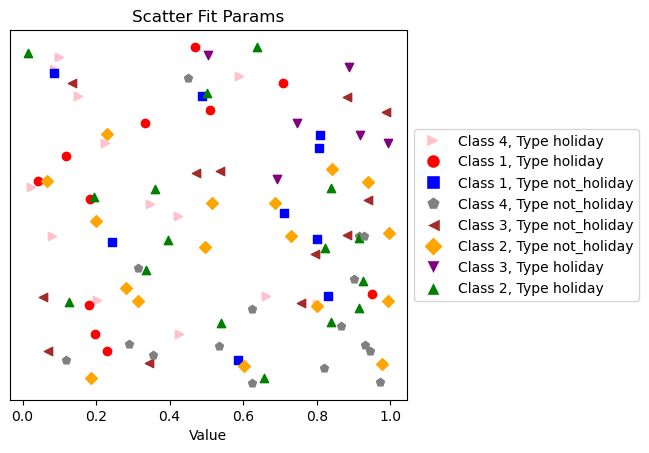

In [53]:
def ScatterFitParams(A, b, classes, types,Class2Type2Colors,Class2Type2Shapes,Title,Xlabel,Ylabel):
    assert len(A) == len(b) == len(classes), 'The input lists must have the same length'
    legend = []
    legend_entries = set()
    fig, ax = plt.subplots()
    for point, std_dev, cls,type in zip(A, b, classes,types):
        color = Class2Type2Colors[cls][str(type)]
        shape = Class2Type2Shapes[cls][str(type)]
        # Plot point
        class_type_identifier = (cls, str(type))
        print("Point: ",round(point,2)," StdDev: ",round(std_dev,2)," Class:",cls," type: ",type," Color: ",color," Shape: ",shape," Identifier: ",class_type_identifier)
        ax.scatter(point, std_dev, marker=shape, color=color)
        if class_type_identifier not in legend_entries:
            legend.append(Line2D([0], [0], marker=shape, color='w', markerfacecolor=color, markersize=10, label=f"Class {cls}, Type {type}"))
            legend_entries.add(class_type_identifier)
            TemporaryAddLegend = True
    # Customize the plot
    ax.set_yticks([])  # Hide y-axis
    ax.set_xlabel(Xlabel)
    ax.set_ylabel(Ylabel)
#    legend_ = plt.legend(legend)
#    frame = legend_.get_frame()
#    frame.set_facecolor('white')    
    plt.title(Title)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Resize plot to make space for the legend
    print(legend)
    ax.legend(handles = legend,loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
    
    # Show plot
    plt.show()

ScatterFitParams(Avareges, std_devs, classes, types,Class2Type2Colors,Class2Type2Shapes,"Scatter Fit Params")

In [1]:
import geopandas as gpd
gdf = gpd.read_file("/home/aamad/Desktop/phd/codice/city-pro/city-pro-carto.geojson")

In [58]:
import itertools

series = [
    [1, 2, 3],
    [1, 2, 4],
    [3, 3, 4,6],
    [2, 3, 5]
]

n = 1

groups = itertools.groupby(series, key=lambda x: tuple(x[:n+1]))

for key, group in groups:
    print(f"Key: {key}")
    for item in group:
        print(f"  Item: {item}")

Key: (1, 2)
  Item: [1, 2, 3]
  Item: [1, 2, 4]
Key: (3, 3)
  Item: [3, 3, 4, 6]
Key: (2, 3)
  Item: [2, 3, 5]


In [1]:
from numpy import random
L = 3
comb = [random.randint(20,100) for i in range(L)]
c0 = random.random()*2
c1 = random.random()*2
d = random.random()*2
print(comb,c0,c1,d)


[25, 67, 28] 0.1517484756935079 0.319497325302865 0.8399702407907828


In [1]:
import numpy as np
def ComputeNumberPartitions(n,m,i,NumberPartition):
    
    if m < n:
        if i == 1 and i < n - m:
            NumberPartition = 1
            i += 1
            ComputeNumberPartitions(n - m,i,NumberPartition)
        if i < n
            i += 1
            NumberPartition = ComputeNumberPartitions(n - m,i,NumberPartition)
    else:
        print("m>=n")
        exit()

SyntaxError: expected ':' (2702245768.py, line 6)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
v0 = 0
v1 = 20
mu = 20
sigma = 2
NR = 1000
# P(Capacity) = [c0,...,cNR]
np.random.seed(0)
Cs = np.random.exponential(1, 1000)
# Capacity Roads
C = np.sum(Cs)
v = np.linspace(v0,v1,1)
G = np.exp(-((v-mu)**2)/(2*sigma**2))